# Initialization

In [1]:
#Import all the UTILITY functions
from UTILITY_quickstart import *

#Look at the signature and documentation for initializeTao()
?initializeTao

Signature:
initializeTao(
    filePath=None,
    lastTrackedElement='end',
    csrTF=False,
    inputBeamFilePathSuffix=None,
    numMacroParticles=None,
    loadDefaultLatticeTF=True,
    defaultsFile=None,
    runImpactTF=False,
    impactGridCount=32,
)
Docstring: <no docstring>
File:      ~/Documents/SLAC/FACET2-Bmad-PyTao/UTILITY_quickstart.py
Type:      function

In [2]:
#Load a default configuration
importedDefaultSettings = loadConfig("setLattice_configs/2024-10-22_oneBunch_baseline.yml")

#Initialize tao object
tao = initializeTao(
    #inputBeamFilePathSuffix = importedDefaultSettings["inputBeamFilePathSuffix"],
    #numMacroParticles = 1e4,
    csrTF = False,

    #Commands to start and run IMPACT
    runImpactTF = True,
    numMacroParticles = 1e4,
    impactGridCount = 8
)

Environment set to:  /Users/nmajik/Documents/SLAC/FACET2-Bmad-PyTao
Tracking to end
CSR off
Overwriting lattice with setLattice() defaults
No defaults file provided to setLattice(). Using setLattice_configs/defaults.yml
Running Impact
	 Impact: Autophasing
	 Impact: Distgen
	 Impact: Tracking
Running Impact-T in /Users/nmajik/Documents/SLAC/FACET2-Bmad-PyTao/impact/tmpd4jqc9ht
/opt/homebrew/anaconda3/envs/bmad/bin/ImpactTexe
writing 10000 particles to /Users/nmajik/Documents/SLAC/FACET2-Bmad-PyTao/impact/tmpd4jqc9ht/partcl.data
Cathode start with cathode_kinetic_energy_ref = 1.0 eV
Cathode start: Replaced Np with 10000 according to initial particles
Cathode start: Replaced Bkenergy with 1.0 according to initial particles
Cathode start: Replaced Temission with 6.975027738393908e-12 according to initial particles
Cathode start: Replaced Tini with -3.494221907926707e-12 according to initial particles
Setting total charge to 1.6000000000000007e-09 C
 !--------------------------------------

# Track beam

In [3]:
#Track the beam from start to end
trackBeam(tao)

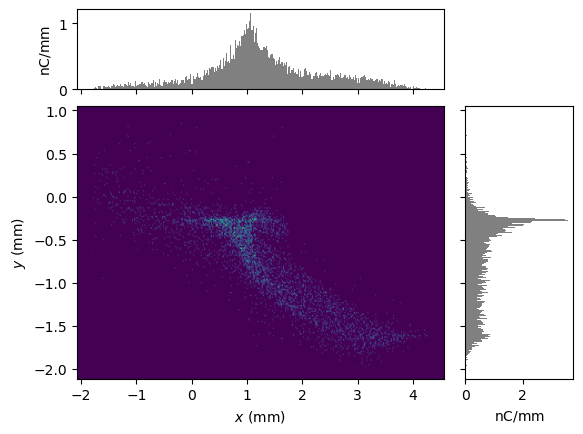

ParticleGroup with 8780 particles with total charge 1.4048000000000008e-09 C


<Figure size 640x480 with 0 Axes>

In [4]:
#Get the beam at element "DTOTR"
P =  getBeamAtElement(tao, "DTOTR")

#Plot the x-y projection of the beam at that location
display(plotMod(P, 'x', 'y',  bins=300));
plt.clf()

print(P)

# Change a quad setting and retrack

In [5]:
#Set the strength final focus quad named Q0FF to zero kilogauss 
setQuadkG(tao, "Q0FF", 0)

#Track the beam through the now modified lattice
trackBeam(tao)

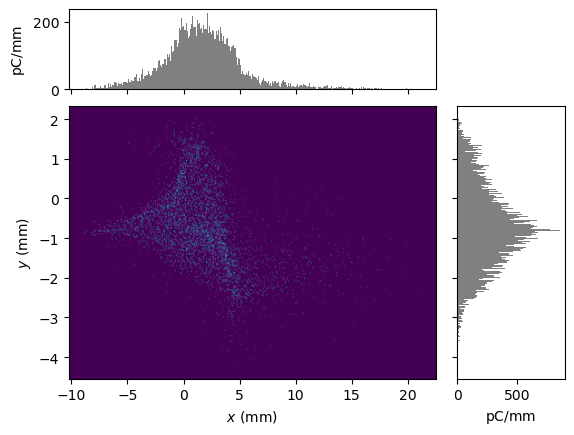

ParticleGroup with 8780 particles with total charge 1.4048000000000008e-09 C


In [6]:
P =  getBeamAtElement(tao, "DTOTR")

display(plotMod(P, 'x', 'y',  bins=300));
plt.clf()

print(P)

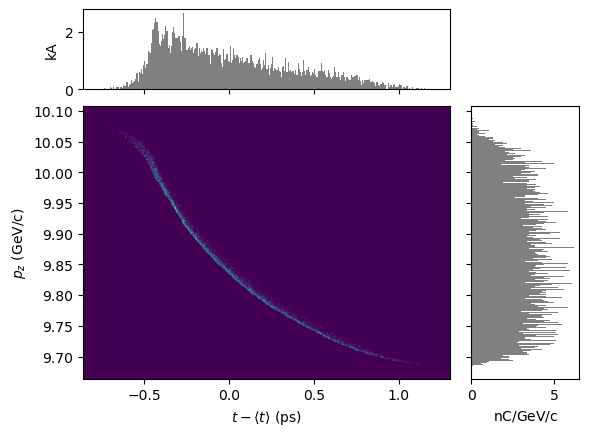

ParticleGroup with 8780 particles with total charge 1.4048000000000008e-09 C


In [7]:
#Get the beam at the element MFFF, at the exit of BC20
P =  getBeamAtElement(tao,"MFFF")

#Plot the longitudinal phase space
display(plotMod(P, 'delta_t', 'pz',  bins=300));
plt.clf()

print(P)

# Change L2 phase and retrack

In [8]:
#Change the phase of L2 to -10 degrees
setLinacPhase(tao, "L2", -10)
trackBeam(tao)

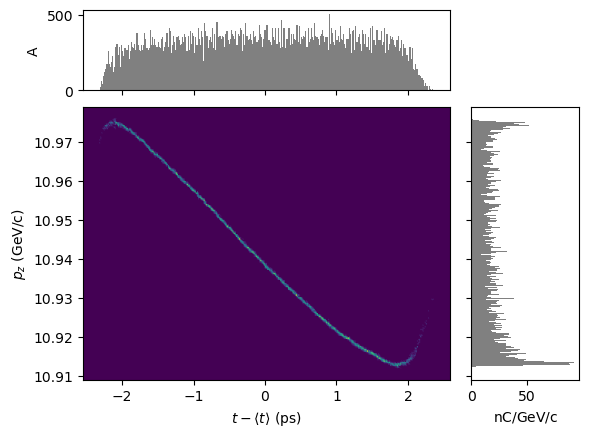

ParticleGroup with 8992 particles with total charge 1.438720000000001e-09 C


In [9]:
P =  getBeamAtElement(tao, "MFFF")


display(plotMod(P, 'delta_t', 'pz',  bins=300));
plt.clf()

print(P)